# Grover's algorithm

References for Grover algorithm:
    
[Qiskit text book on Grover algorithm](https://learn.qiskit.org/course/introduction/grovers-search-algorithm)

* analogy of phone book and looking for name having phone number - unstructured search (for structured/sorted databased binary search has logaritmic complexity, so good enough)
* $\sqrt{N}$ complexity so **quadratic improvement** over classical algorithm (simply going one by one and checking)
* If we can make a problem look like a database search problem, then we can use Grover algorithm to solve it => quite generic algorithm.
* Examples:
    * looking for Sudoku solution
    * Boolean satisfiability problem (known as 'SAT')

### Let's explore a 3 qubit example (8 possible states) with our winner (searched item) being $|110>$ = $|6>$:

In [1]:
from qiskit import *

oracle = QuantumCircuit(3, name="oracle")
oracle.x(0)
oracle.h(2)
oracle.ccx(0,1,2)
oracle.x(0)
oracle.h(2)

oracle.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_1: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_2: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [2]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(5, 2**3)
state = state.evolve(oracle)
state.draw('latex')

<IPython.core.display.Latex object>

In [3]:
diffuser = QuantumCircuit(3, name="diffuser")
diffuser.h([0,1,2])
diffuser.x([0,1,2])
diffuser.barrier()
diffuser.h(2)
diffuser.ccx(0,1,2)
diffuser.h(2)
diffuser.barrier()
diffuser.x([0,1,2])
diffuser.h([0,1,2])
diffuser.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

In [4]:
grover = QuantumCircuit(3, 3)
grover.h([0,1,2])
grover.append(oracle, [0,1,2])
grover.append(diffuser, [0,1,2])
grover.measure([0,1,2], [0,1,2])

grover.draw()

┌───┐┌─────────┐┌───────────┐┌─┐      
q_0: ┤ H ├┤0        ├┤0          ├┤M├──────
     ├───┤│         ││           │└╥┘┌─┐   
q_1: ┤ H ├┤1 oracle ├┤1 diffuser ├─╫─┤M├───
     ├───┤│         ││           │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2        ├┤2          ├─╫──╫─┤M├
     └───┘└─────────┘└───────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════╩══╩══╩═
                                   0  1  2

In [5]:
import math

num_iterations = round(math.pi* math.sqrt(8)/4)
print(num_iterations)


2


C:\Users\P39686820\AppData\Local\Temp\ipykernel_34048\224664514.py:18: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


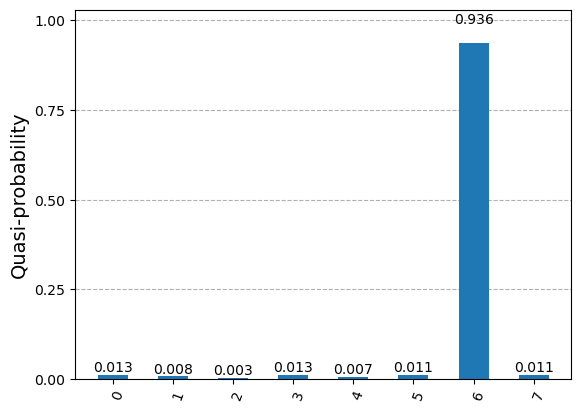

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
from qiskit import transpile

grover = QuantumCircuit(3, 3)
grover.h([0,1,2])

for i in range(num_iterations):
    grover.append(oracle, [0,1,2])
    grover.append(diffuser, [0,1,2])

grover.measure([0,1,2], [0,1,2])

backend = BasicSimulator()
grover_transpiled = transpile(grover, backend)

sampler = Sampler()
job = sampler.run(grover_transpiled, shots=1024)
counts = job.result().quasi_dists[0]
plot_histogram(counts)

## Exercise:
Construct analogical Grover circuit to look for state $|101>$

## Exercise:
* Construct Grover circuit looking for state |1001> out of 16 possible 4-qubit states.
* Hint: to construct oracle and diffuser you can use mct() (multi-controlled-toffoli) gate in Qiskit.
* What is the optimal number of Grover iterations?

# Qiskit provides us a ready implementation of Grover algorithm, so you need only the oracle ;)
More here: https://qiskit.org/documentation/tutorials/algorithms/06_grover.html

In [7]:
good_state = ['110']

Top measurement: 110
optimal_num_iterations: 2


C:\Users\P39686820\AppData\Local\Temp\ipykernel_34048\2718014903.py:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  grover = Grover(sampler=Sampler(), iterations=num_iterations)


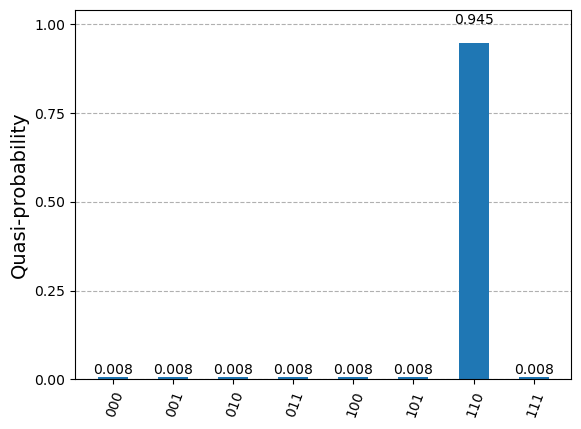

In [8]:
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.primitives import Sampler
 

problem = AmplificationProblem(oracle=oracle, is_good_state=good_state)
grover = Grover(sampler=Sampler(), iterations=num_iterations)
result = grover.amplify(problem)
print('Top measurement:', result.top_measurement)
print('optimal_num_iterations:', grover.optimal_num_iterations(1, 3)) #1=number of solutions, 3=num qubits
plot_histogram(result.circuit_results)

The results obtained is of type `GroverResult`:

In [21]:
print(result)

{   'assignment': '110',
    'circuit_results': [   {   '000': 0.0078125,
                               '001': 0.0078125,
                               '010': 0.0078125,
                               '011': 0.0078125,
                               '100': 0.0078125,
                               '101': 0.0078125,
                               '110': 0.945312499999996,
                               '111': 0.0078125}],
    'iterations': [2],
    'max_probability': 0.945312499999996,
    'oracle_evaluation': True,
    'top_measurement': '110'}


* `oracle` can be a QuantumCircuit object is the oracle is provided in this form
* then the `is_good_state` function needs to be implemented and provided 

And even simpler method using Statevector (no need to be able to construct the oracle)

In [9]:
oracle = Statevector.from_label('110')
problem = AmplificationProblem(oracle, is_good_state=['110'])
result = grover.amplify(problem)
print('Top measurement:', result.top_measurement)

Top measurement: 110
